In [231]:
import pandas as pd  # For data manipulation
import numpy as np
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import LabelEncoder  # For encoding categorical data
from sklearn.naive_bayes import GaussianNB  # For the Naive Bayes model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting graphs


In [232]:
data = pd.read_csv("https://raw.githubusercontent.com/gkrishna9790/Logistic-Regression-Binary-Classification/master/Archieve/banking.csv")

In [233]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [234]:
data.shape

(41188, 21)

In [235]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [237]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [238]:
data.duplicated().sum()

12

In [239]:
data = data.drop_duplicates()

In [240]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [241]:
data.duplicated().sum()

0

In [242]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [243]:
# Look at basic statistics of the data
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000      

### Separate the categorical and numerical variables

In [245]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [246]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [247]:
cat_data = data[categorical]

In [248]:
numerical = [var for var in data.columns if data[var].dtype!='O']

In [249]:
num_data = data[numerical]

In [250]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [251]:
cat_data.shape

(41176, 10)

In [252]:
num_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [253]:
num_data.shape

(41176, 11)

In [254]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [255]:
cat_data['education']=np.where(cat_data['education']=='basic.9y','Basic',cat_data['education'])
cat_data['education']=np.where(cat_data['education']=='basic.6y','Basic',cat_data['education'])
cat_data['education']=np.where(cat_data['education']=='basic.4y','Basic',cat_data['education'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4652\1550778600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['education']=np.where(cat_data['education']=='basic.9y','Basic',cat_data['education'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4652\1550778600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['education']=np.where(cat_data['education']=='basic.6y','Basic',cat_data['education'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4652\1550778600.py:3: SettingWithCopyWarning: 
A val

In [256]:
data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])

In [257]:
data.education.value_counts()

education
Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [258]:
data['education'] = data['education'].str.replace(".","_")  #replace() is a string, so we have to convert object to str.

In [259]:
data['education'].value_counts()

education
Basic                  12512
university_degree      12164
high_school             9512
professional_course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [260]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [261]:
cat_data.nunique()

job            12
marital         4
education       6
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [262]:
cat_data.education.value_counts()

education
Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [263]:
cat_data.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [264]:
cat_data.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [265]:
cat_data.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [266]:
cat_data.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [267]:
cat_data.isna().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [268]:
data.education.nunique()

6

### Split train-test data

In [270]:
X = data.drop(['y'], axis=1)  #X = claims_1.drop(['fraudulent'],axis=1)

y = data['y']                 #y = Claims_1['fraudulent']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [272]:
X_train.shape, X_test.shape

((32940, 20), (8236, 20))

### Working on X-train data

In [274]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [275]:
X_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [276]:
cat_var = cat_data.columns.to_list()
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [277]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
10604,58,retired,married,professional_course,no,no,no,cellular,nov,fri,127,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8
40351,35,admin.,married,university_degree,unknown,yes,no,telephone,jun,mon,134,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1
21899,53,retired,divorced,Basic,no,no,no,telephone,may,mon,460,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
24834,36,technician,single,professional_course,no,no,no,telephone,jul,thu,237,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
5824,42,management,divorced,unknown,no,yes,no,cellular,aug,wed,266,2,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2


In [346]:
# Adjust to only include existing columns
existing_cat_var = [col for col in cat_var if col in X_train.columns]
X_train = pd.get_dummies(X_train, columns=existing_cat_var)

### Building a Naive Bayes Model

In [348]:
from sklearn.naive_bayes import GaussianNB  #Gaussian distribution/Normal distribution,so you don't have to do any transformation to achieve normal distribution , it is done automatically by the GaussianNB().
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [281]:
X_train.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
10604,58,127,1,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,False,False,True,False,False,False,False,True,False,False
40351,35,134,3,999,0,1.4,94.465,-41.8,4.865,5228.1,...,False,False,False,True,False,False,False,False,True,False
21899,53,460,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
24834,36,237,7,999,0,1.4,93.918,-42.7,4.968,5228.1,...,False,False,False,False,True,False,False,False,True,False
5824,42,266,2,999,0,-2.9,92.201,-31.4,0.879,5076.2,...,False,False,False,False,False,False,True,False,True,False


In [350]:
y_train_pred = gnb.predict(X_train)

In [354]:
y_train_pred = pd.Series(y_train_pred)

In [356]:
Model_data_train = pd.DataFrame(y_train)

In [358]:
Model_data_train

,y
10604,0
40351,0
21899,0
24834,0
5824,0
...,...
20759,0
32110,0
30410,0
21245,0


In [360]:
Model_data_train['y_pred'] = y_train_pred

In [362]:
Model_data_train

,y,y_pred
10604,0,0.0
40351,0,NaN
21899,0,0.0
24834,0,0.0
5824,0,0.0
...,...,...
20759,0,0.0
32110,0,0.0
30410,0,1.0
21245,0,0.0


In [364]:
pd.crosstab(Model_data_train.y,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
y,,,
0,20091,3262,23353
1,2557,430,2987
All,22648,3692,26340


In [366]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[26561  2671]
 [ 1816  1892]]

True Positives(TP) =  26561

True Negatives(TN) =  1892

False Positives(FP) =  2671

False Negatives(FN) =  1816


(2, 2)

<Axes: >

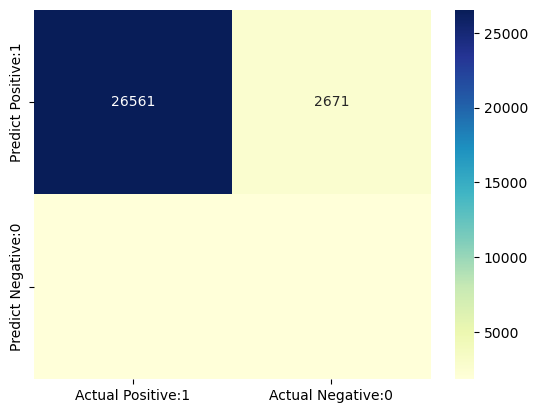

In [368]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [370]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     29232
           1       0.41      0.51      0.46      3708

    accuracy                           0.86     32940
   macro avg       0.68      0.71      0.69     32940
weighted avg       0.88      0.86      0.87     32940



In [372]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.8638
